# Correlation and Autocorrelation in Time Series - Lab

## Introduction

In this lab, You'll practice your knowledge on correlation, autocorrelation and the ACF and PACF.

## Objectives

You will be able to:
- Understand correlation in Time Series
- Plot and discuss the autocorrelation function (ACF) for a time-series 
- Plot and discuss the partial autocorrelation function (PACF) for a time-series 
- Interpret ACF and PACF and Identify use cases both functions

## The Exchange Rate Data

We'll be looking at the exchange rates dataset again. First, import the necessary libraries for time series and plotting. Then import the data (in `exch_rates.csv`) and make sure it's set in the correct time series format with the `datetime` as the index.

In [7]:
# your code here
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [3]:
# your code here
rates = pd.read_csv("exch_rates.csv")
rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6905 entries, 0 to 6904
Data columns (total 4 columns):
Frequency            6905 non-null object
Euro                 4838 non-null float64
Australian Dollar    4838 non-null float64
Danish Krone         4838 non-null float64
dtypes: float64(3), object(1)
memory usage: 215.9+ KB


In [4]:
rates["Frequency"]=pd.to_datetime(rates["Frequency"])
rates.set_index("Frequency", inplace = True)
rates.head()

,Euro,Australian Dollar,Danish Krone
Frequency,,,
2000-01-01,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN
2000-01-03,0.991080,1.520912,7.374034
2000-01-04,0.970403,1.521300,7.222610
2000-01-05,0.964506,1.521316,7.180170


Plot the three exchange rates in one plot

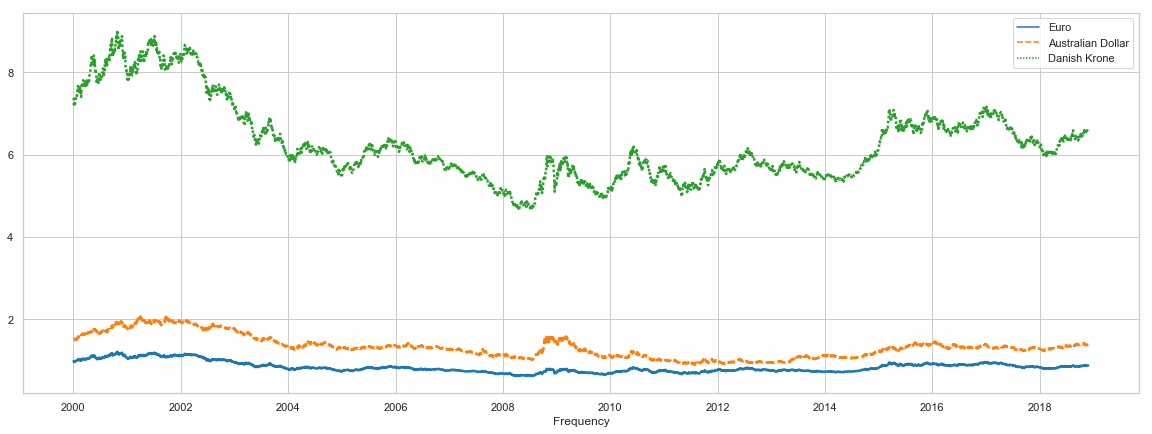

In [16]:
# your code here
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(20,7))
sns.lineplot(data=rates, palette="tab10", linewidth=2.5);


You can see that the EUR/USD and AUD/USD exchange rate are somewhere between rougly 0.5 and 2 between 2000 and 2018, where the Danish Krone is somewhere between roughly 4.5 and 9. Now let's look at the correlations between these time series.

In [17]:
# your code here
rates.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.883181,0.999952
Australian Dollar,0.883181,1.000000,0.882513
Danish Krone,0.999952,0.882513,1.000000


### What is your conclusion here? You might want to use outside resources to understand what's going on.

Next, look at the plots of the differenced series. Use subplots to plot them rather than creating just one plot.

In [25]:
# your code here
euro_diff = rates["Euro"].diff(periods=1)
aud_diff = rates["Australian Dollar"].diff(periods = 1)
dkk_diff = rates["Danish Krone"].diff(periods=1)

rates_diff = rates.diff(periods=1)

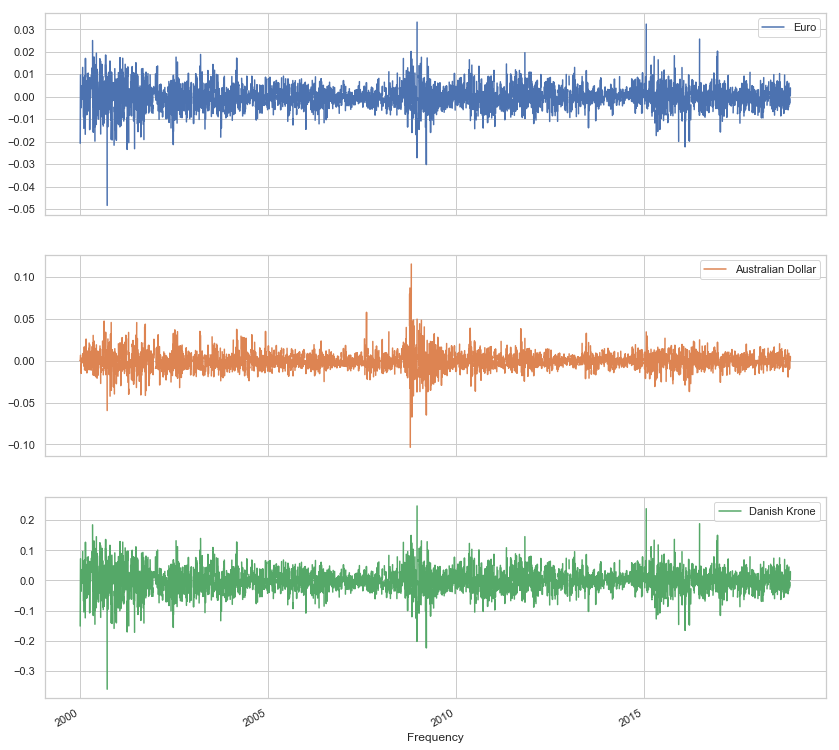

In [27]:
# your code here
rates_diff.plot(figsize=(14,14), subplots=True, legend=True);


In [28]:
# your code here
rates_diff.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.545369,0.999667
Australian Dollar,0.545369,1.000000,0.545133
Danish Krone,0.999667,0.545133,1.000000


### Explain what's going on

Next, let's look at the "lag 1 autocorrelation" for the EUR/USD exchange rate. Create a "lag 1 autocorrelation" series, plot the result, and look at the correlation coefficient.

In [32]:
# your code here
euro = rates[["Euro"]]

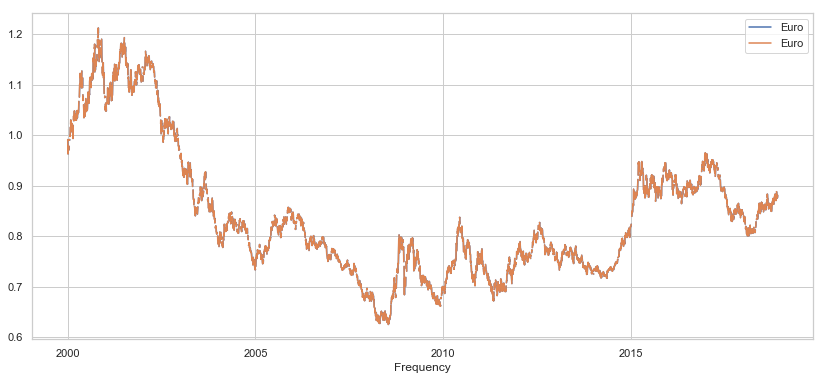

In [35]:
# your code here
euro_shift_1 = euro.shift(periods=1)
lag_1=pd.concat([euro_shift_1, euro], axis=1)

lag_1.plot(figsize=(14,6))

In [36]:
# your code here
lag_1.corr()

,Euro,Euro
Euro,1.000000,0.999146
Euro,0.999146,1.000000


Repeat this, but for a "lag 5 autocorrelation"

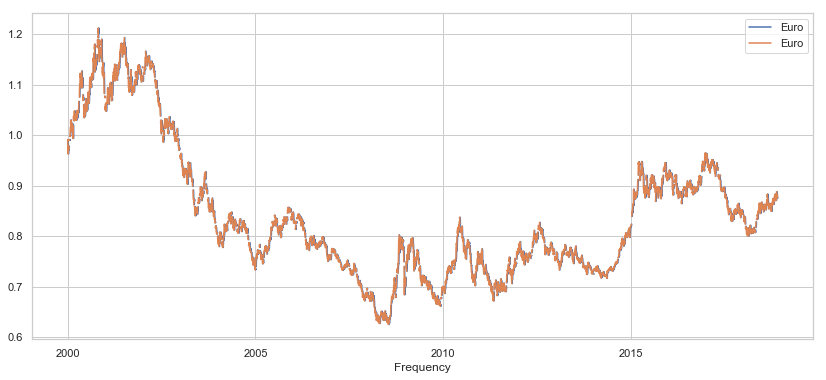

In [37]:
# your code here
euro_shift_5 = euro.shift(periods=5)
lag_5=pd.concat([euro_shift_5, euro], axis=1)

lag_5.plot(figsize=(14,6))

In [38]:
# your code here
lag_5.corr()

,Euro,Euro
Euro,1.000000,0.997518
Euro,0.997518,1.000000


### What's your conclusion here?

Knowing this, let's plot the ACF now.

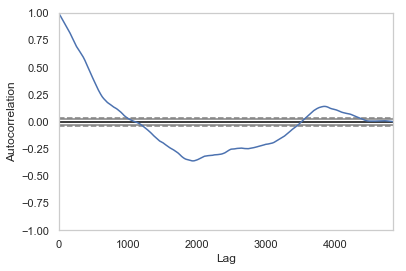

In [40]:
# your code here
pd.plotting.autocorrelation_plot(euro.dropna());

The series is heavily autocorrelated at first, and then there is a decay. This is a typical result for a series that is a random walk, generally you'll see heavy autocorrelations first, slowly tailing off until there is no autocorrelation anymore.

Next, let's look at the Partial Autocorrelation Function.

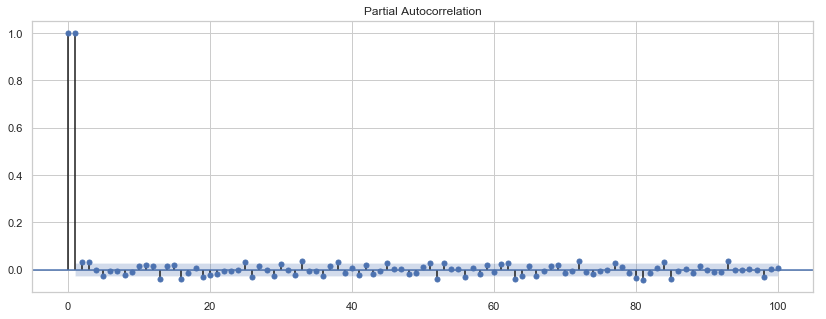

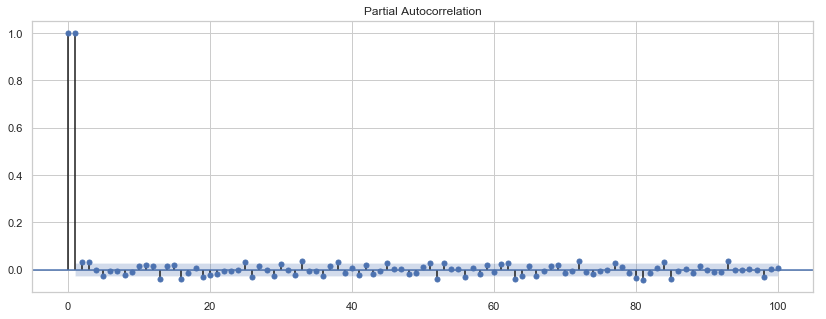

In [44]:
# your code here
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams["figure.figsize"]=14,5
plot_pacf(euro.dropna(), lags=100)

This is interesting! Remember that *Partial Autocorrelation Function* gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags. When controlling for 1 period lags, the PACF is only very high for one-period lags, and basically 0 for shorter lags. This is again a typical result for Random Walk series!

## The Airpassenger Data

Look at ACF and PACF for the airpassenger data and describe the result `passengers.csv`. Do this both for the differenced and regular series.

In [47]:
# your code here
air = pd.read_csv("passengers.csv")
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null object
#Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [48]:
# your code here
air["Month"]=pd.to_datetime(air["Month"])
air.set_index("Month", inplace = True)
air.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


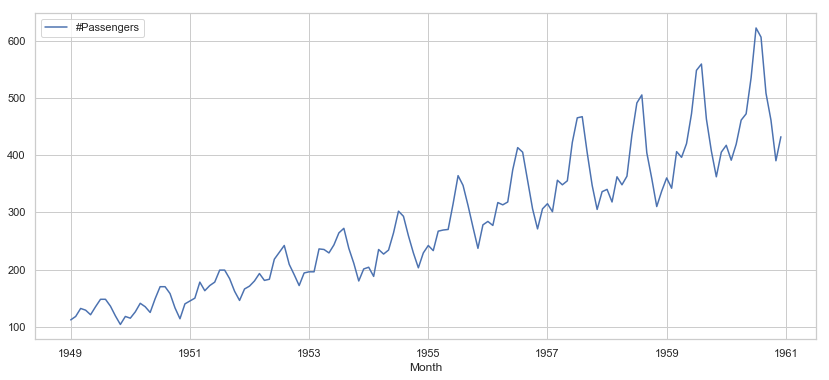

In [51]:
air.plot(figsize=(14,6))

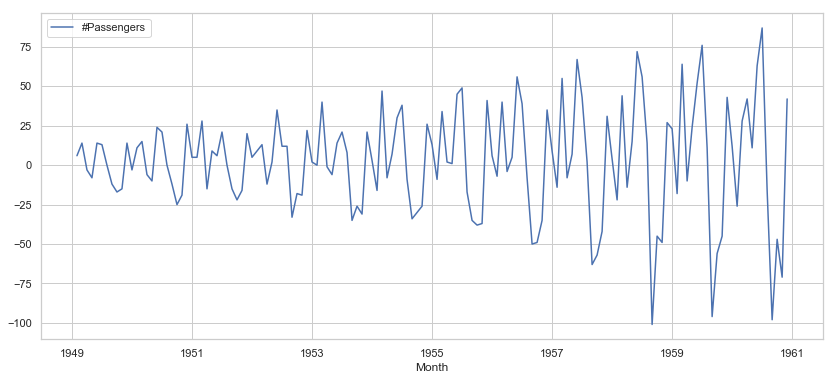

In [50]:
# your code here
air_diff = air.diff(periods=1)
air_diff.plot(figsize=(14,6))

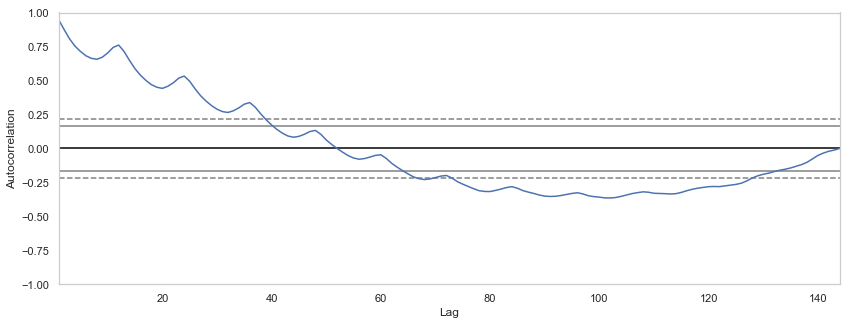

In [55]:
# your code here
pd.plotting.autocorrelation_plot(air.dropna())

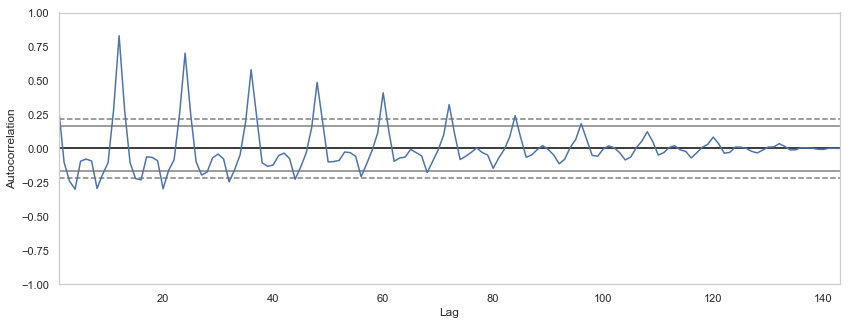

In [54]:
# your code here
pd.plotting.autocorrelation_plot(air_diff.dropna())

/Users/miyakusumoto/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


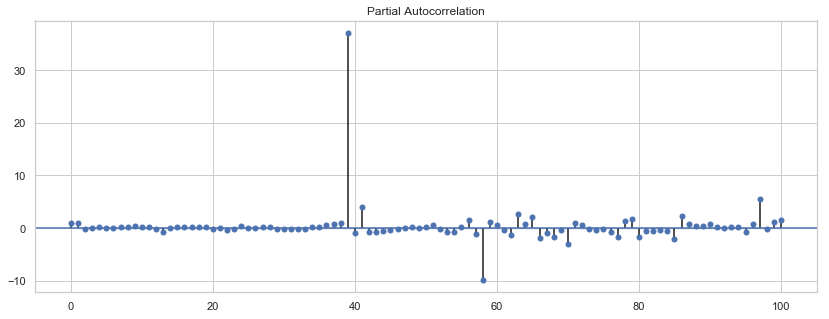

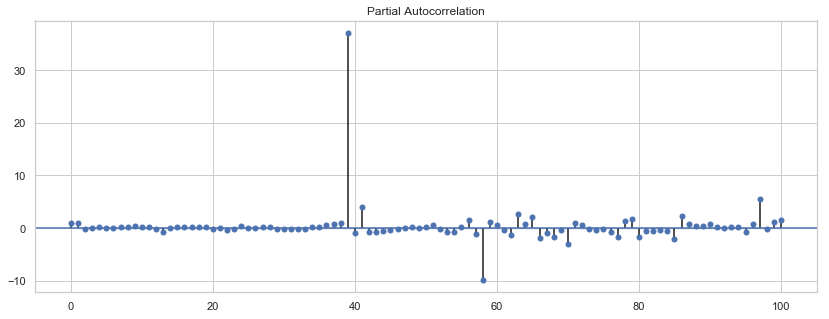

In [56]:
# your code here
rcParams["figure.figsize"]=14,5
plot_pacf(air.dropna(), lags=100)

/Users/miyakusumoto/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


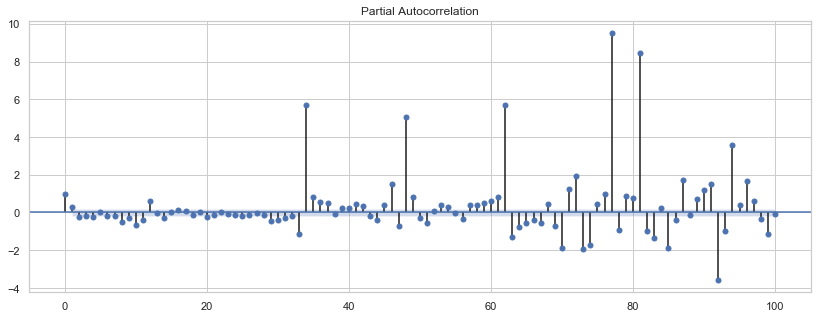

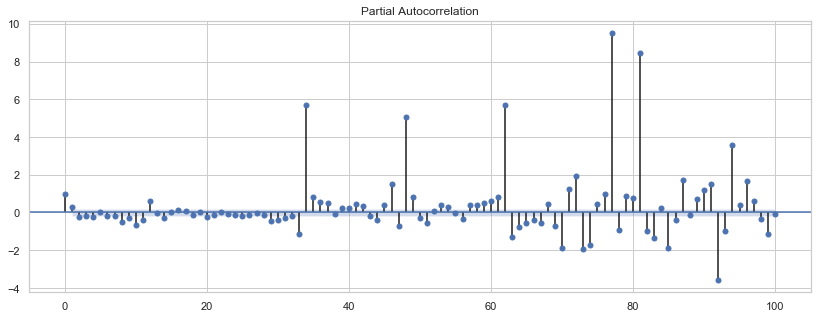

In [57]:
# your code here
rcParams["figure.figsize"]=14,5
plot_pacf(air_diff.dropna(), lags=100)

### Your conclusion here

## The NYSE data

Look at correlation and autocorrelation functions for the NYSE data ("NYSE_monthly.csv")

In [59]:
# your code here
nyse = pd.read_csv("NYSE_monthly.csv")
nyse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
Month             72 non-null object
monthly_return    72 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


In [60]:
# your code here
nyse["Month"]=pd.to_datetime(nyse["Month"])
nyse.set_index("Month", inplace=True)

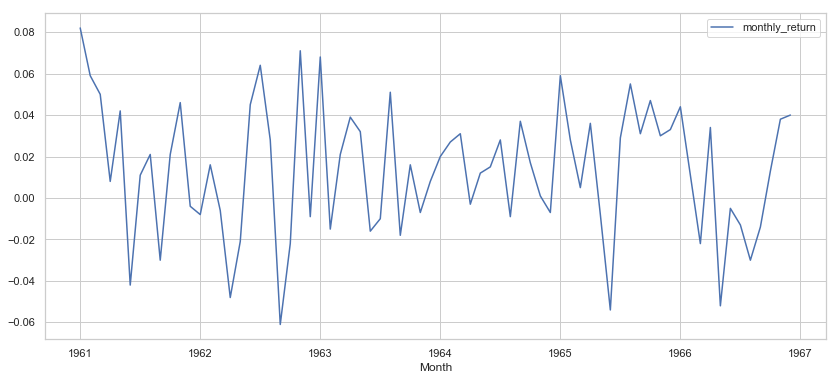

In [61]:
# your code here
nyse.plot(figsize=(14,6))

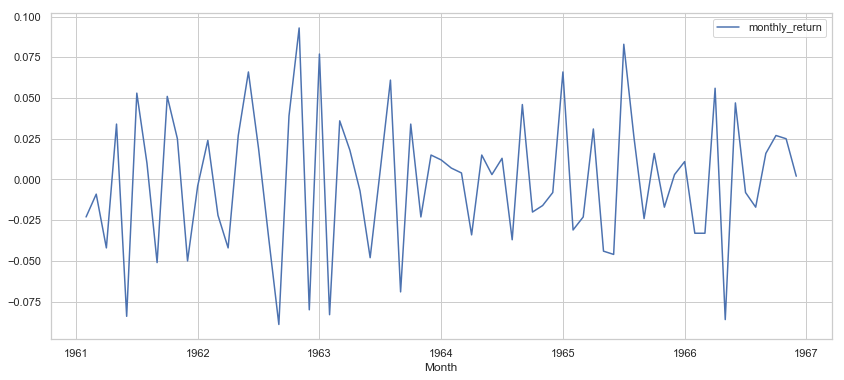

In [62]:
nyse_diff = nyse.diff(periods=1)
nyse_diff.plot(figsize=(14,6))

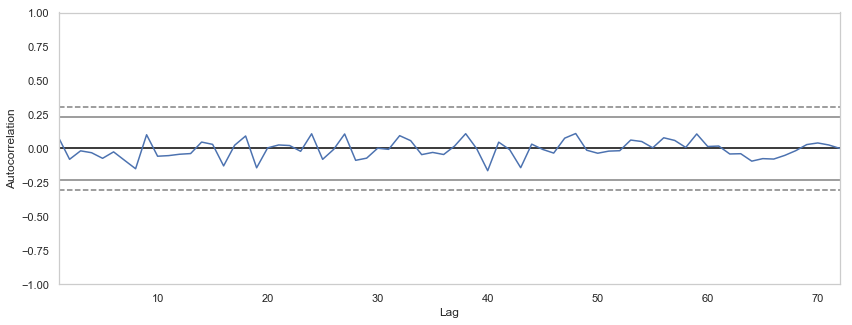

In [63]:
pd.plotting.autocorrelation_plot(nyse.dropna())

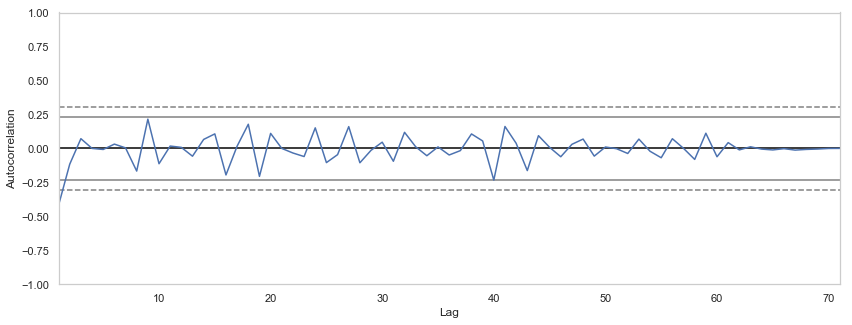

In [64]:
pd.plotting.autocorrelation_plot(nyse_diff.dropna())

/Users/miyakusumoto/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/Users/miyakusumoto/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1275: RuntimeWarning: invalid value encountered in double_scalars
  r[k] = (X[0:-k] * X[k:]).sum() / denom(k)


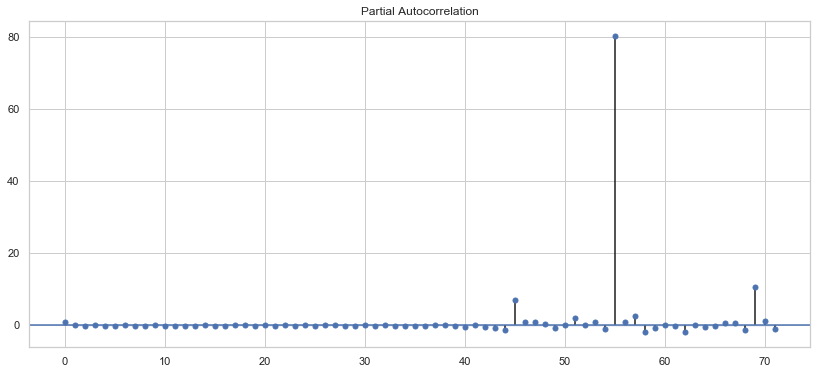

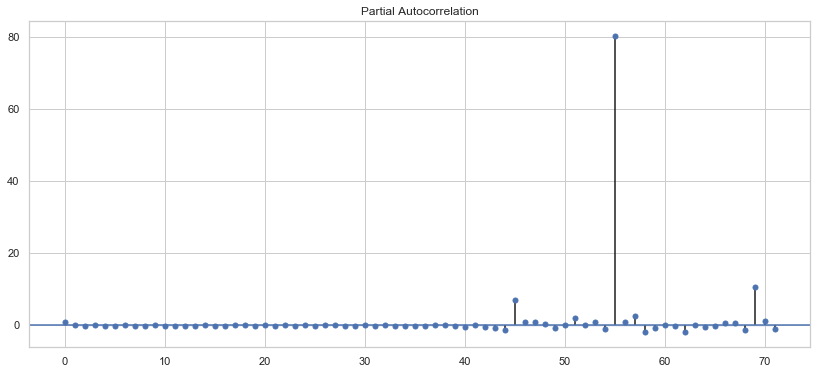

In [65]:
rcParams["figure.figsize"]=14,6
plot_pacf(nyse.dropna(), lags=100)

/Users/miyakusumoto/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/Users/miyakusumoto/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1275: RuntimeWarning: invalid value encountered in double_scalars
  r[k] = (X[0:-k] * X[k:]).sum() / denom(k)


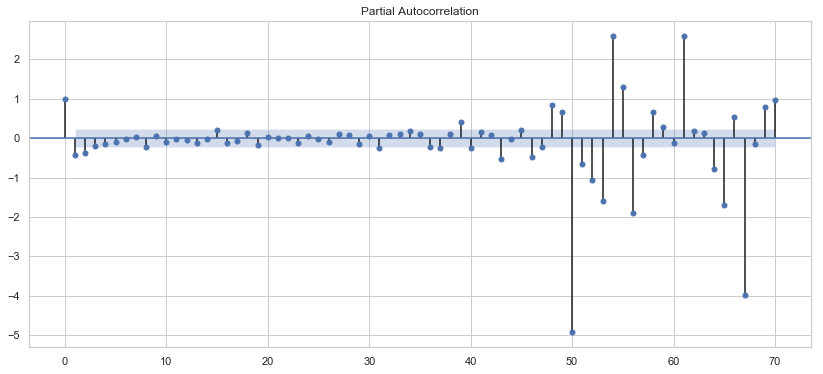

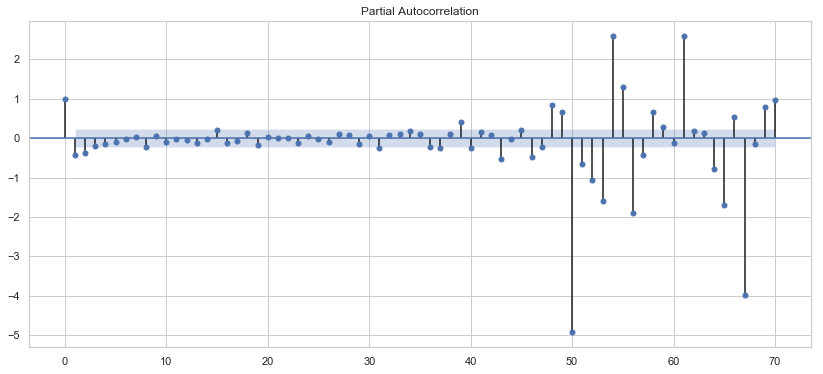

In [66]:
rcParams["figure.figsize"]=14,6
plot_pacf(nyse_diff.dropna(), lags=100)

## Your conclusion here



## Summary

Great, you've now been introduced to correlation, the ACF and PACF. Let's move into more serious modeling with autoregressive and moving average models!